In [23]:
! pip install numpy


[notice] A new release of pip is available: 24.2 -> 25.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [24]:
! pip install pandas


[notice] A new release of pip is available: 24.2 -> 25.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [25]:
! pip install matplotlib


[notice] A new release of pip is available: 24.2 -> 25.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [26]:

! pip install tqdm



[notice] A new release of pip is available: 24.2 -> 25.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [1]:
# importing necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2
from tqdm import tqdm
import warnings
warnings.filterwarnings("ignore")

## Dataset

In [28]:
! pip install tensorflow


[notice] A new release of pip is available: 24.2 -> 25.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [19]:
# importing libraries
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,MaxPooling2D,Activation,Dropout,Flatten,Dense,BatchNormalization
from tensorflow.keras.preprocessing.image import ImageDataGenerator, img_to_array, load_img
from tensorflow.keras.utils import plot_model
from glob import glob
from cv2 import cvtColor
from tensorflow.keras.models import Model
from tensorflow.keras.models import load_model

In [3]:
# change the dataset path based on your dataset location in your computer
train_path="E:/projects/internships/edunet/dataset/DATASET/TRAIN" 
test_path="E:/projects/internships/edunet/dataset/DATASET/TEST"

In [4]:
#visualization

x_data=[]
y_data=[]
for category in glob(train_path+'/*'):
    for file in tqdm(glob(category+'/*')):
        img_array=cv2.imread(file)
        img_array=cv2.cvtColor(img_array, cv2.COLOR_BGR2RGB)
        x_data.append(img_array)
        y_data.append(category.split('/')[-1])
data=pd.DataFrame({'image':x_data,'label':y_data})
print(data)

100%|██████████| 9999/9999 [02:02<00:00, 81.64it/s] 


                                                   image    label
0      [[[255, 255, 255], [255, 255, 255], [255, 255,...  TRAIN\O
1      [[[241, 242, 247], [241, 242, 247], [241, 242,...  TRAIN\O
2      [[[224, 224, 224], [229, 229, 229], [236, 236,...  TRAIN\O
3      [[[255, 255, 255], [255, 255, 255], [255, 255,...  TRAIN\O
4      [[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], ...  TRAIN\O
...                                                  ...      ...
22559  [[[212, 204, 202], [212, 204, 202], [212, 204,...  TRAIN\R
22560  [[[205, 204, 202], [205, 204, 202], [205, 204,...  TRAIN\R
22561  [[[136, 136, 144], [136, 136, 144], [137, 137,...  TRAIN\R
22562  [[[255, 255, 255], [255, 255, 255], [255, 255,...  TRAIN\R
22563  [[[242, 240, 241], [242, 240, 241], [242, 240,...  TRAIN\R

[22564 rows x 2 columns]


In [8]:
data.shape

(22564, 2)

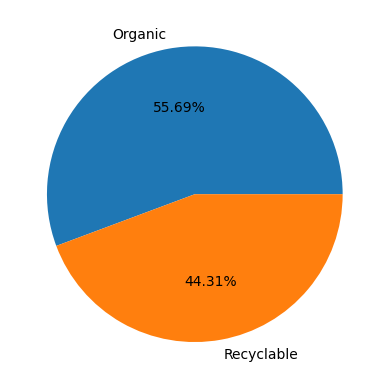

In [9]:
plt.pie(data.label.value_counts(),labels=["Organic","Recyclable"],autopct="%0.2f%%")
plt.show()

## WEEK2 PROGRESS

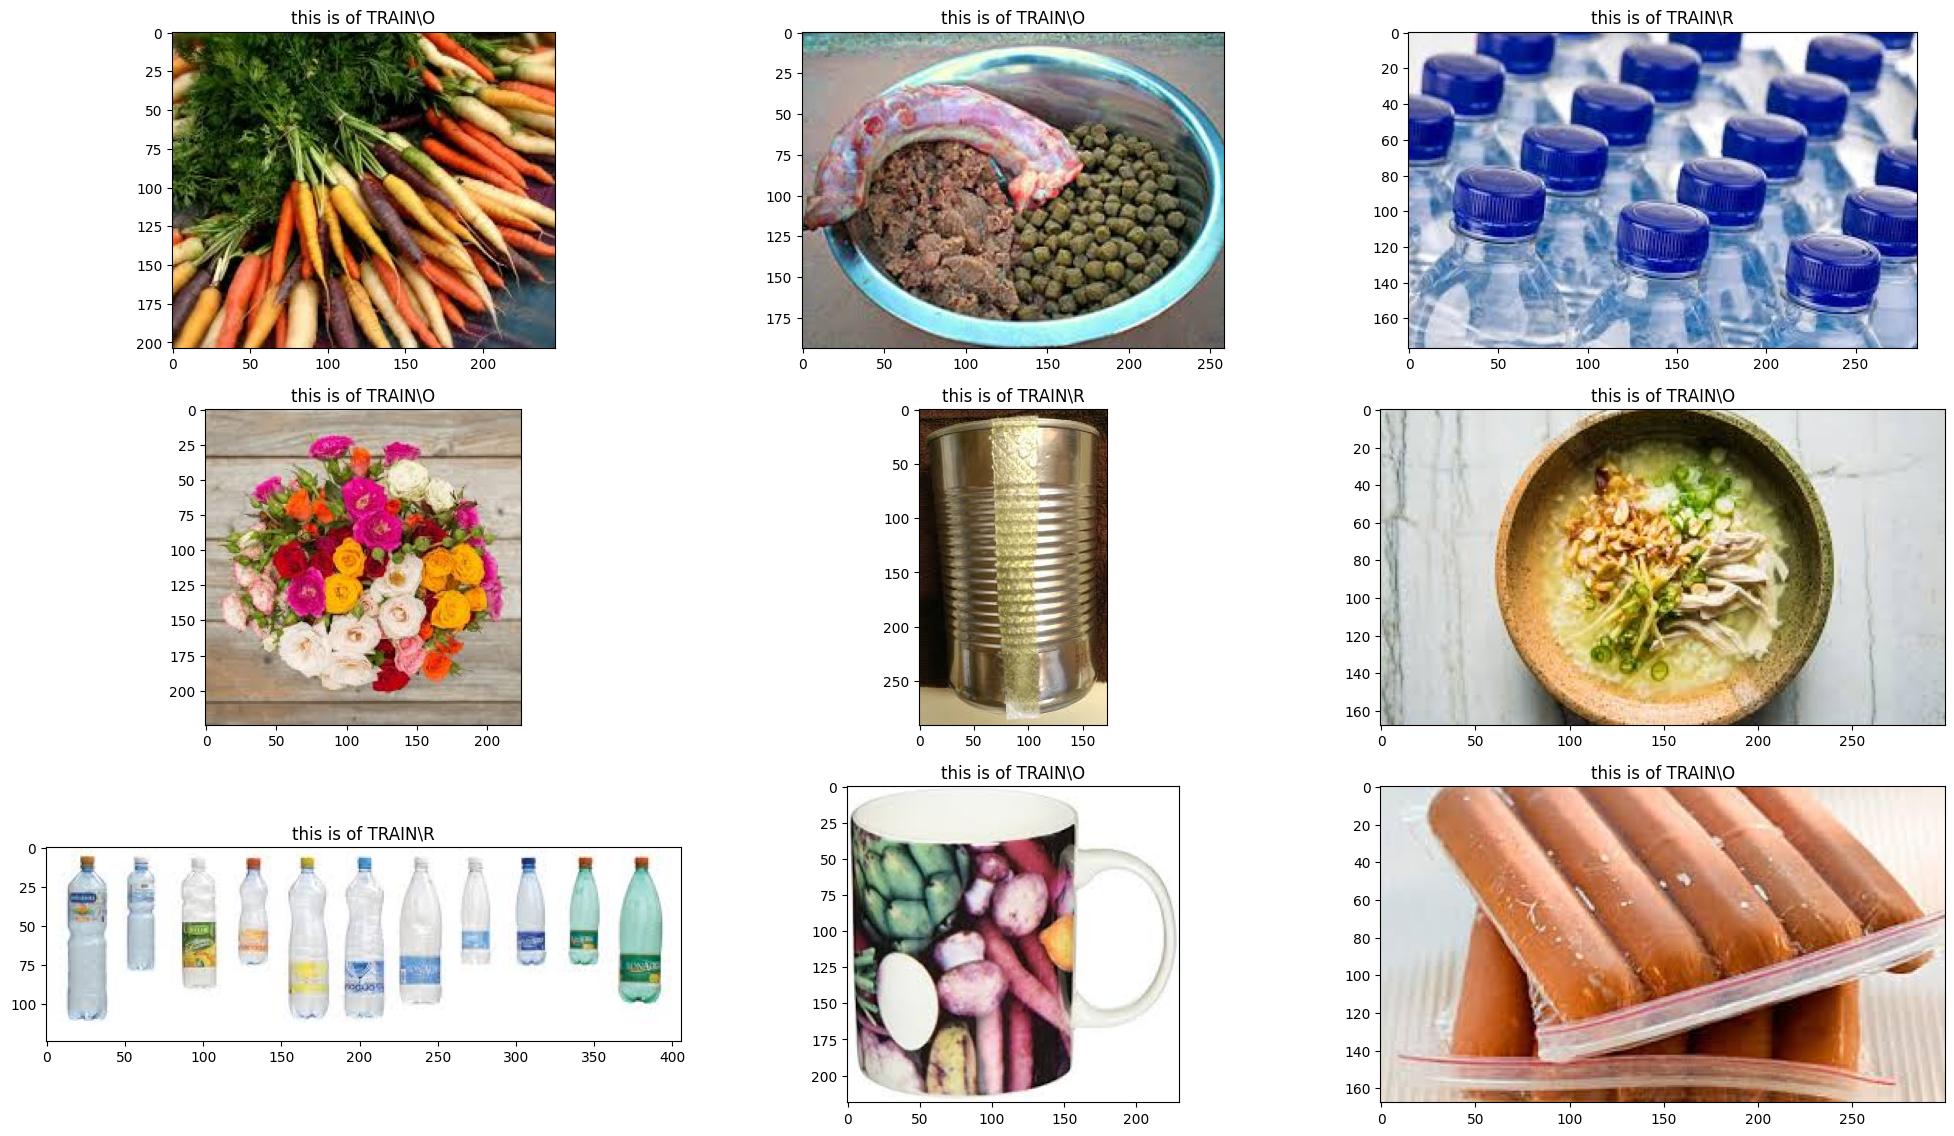

In [10]:
plt.figure(figsize=(20,15))
for i in range(9):
    plt.subplot(4,3,(i%12)+1)
    index=np.random.randint(15000)
    plt.title('this is of {0}'.format(data.label[index]))
    plt.imshow(data.image[index])
    plt.tight_layout()

In [ ]:
model=Sequential()
model.add(Conv2D(32,(3,3),input_shape=(224,224,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D())

model.add(Conv2D(64,(3,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D())

model.add(Conv2D(128,(3,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D())

model.add(Flatten())

model.add(Dense(256))
model.add(Activation('relu'))
model.add(Dropout(0.5))

model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dropout(0.5))

model.add(Dense(2))
model.add(Activation('sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=["accuracy"])
batch_size=256


In [12]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 222, 222, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation (Activation)         │ (None, 222, 222, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 111, 111, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 109, 109, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_1 (Activation)       │ (None, 109, 109, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 54, 54, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 52, 52, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_2 (Activation)       │ (None, 52, 52, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 26, 26, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 86528)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │    22,151,424 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_3 (Activation)       │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │        16,448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_4 (Activation)       │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 2)              │           130 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_5 (Activation)       │ (None, 2)              │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 22,261,250 (84.92 MB)

 Trainable params: 22,261,250 (84.92 MB)

 Non-trainable params: 0 (0.00 B)

In [13]:
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen=ImageDataGenerator(rescale=1./255)

In [14]:
train_generator = train_datagen.flow_from_directory(
    train_path,
    target_size=(224, 224),
    batch_size=batch_size,
    color_mode='rgb',
    class_mode="categorical"
)

test_generator = test_datagen.flow_from_directory(
    test_path,
    target_size=(224, 224),
    batch_size=batch_size,
    color_mode='rgb',
    class_mode="categorical"
)

Found 22564 images belonging to 2 classes.
Found 2513 images belonging to 2 classes.


In [15]:
print("Train generator classes:", train_generator.class_indices)
print("Test generator classes:", test_generator.class_indices)


Train generator classes: {'O': 0, 'R': 1}
Test generator classes: {'O': 0, 'R': 1}


In [16]:
print("Train generator classes:", train_generator.class_indices)
print("Number of training samples:", train_generator.samples)

print("Test generator classes:", test_generator.class_indices)
print("Number of testing samples:", test_generator.samples)


Train generator classes: {'O': 0, 'R': 1}
Number of training samples: 22564
Test generator classes: {'O': 0, 'R': 1}
Number of testing samples: 2513


In [14]:
hist=model.fit(
    train_generator,
    epochs=10,
    validation_data=test_generator
    )

Epoch 1/10
89/89 ━━━━━━━━━━━━━━━━━━━━ 775s 8s/step - accuracy: 0.7056 - loss: 0.6294 - val_accuracy: 0.8627 - val_loss: 0.3680
Epoch 2/10
89/89 ━━━━━━━━━━━━━━━━━━━━ 431s 5s/step - accuracy: 0.8215 - loss: 0.4276 - val_accuracy: 0.8408 - val_loss: 0.3752
Epoch 3/10
89/89 ━━━━━━━━━━━━━━━━━━━━ 412s 5s/step - accuracy: 0.8470 - loss: 0.3718 - val_accuracy: 0.8432 - val_loss: 0.3684
Epoch 4/10
89/89 ━━━━━━━━━━━━━━━━━━━━ 409s 5s/step - accuracy: 0.8630 - loss: 0.3445 - val_accuracy: 0.9061 - val_loss: 0.2849
Epoch 5/10
89/89 ━━━━━━━━━━━━━━━━━━━━ 411s 5s/step - accuracy: 0.8726 - loss: 0.3204 - val_accuracy: 0.8782 - val_loss: 0.3032
Epoch 6/10
89/89 ━━━━━━━━━━━━━━━━━━━━ 410s 5s/step - accuracy: 0.8895 - loss: 0.2785 - val_accuracy: 0.9133 - val_loss: 0.2639
Epoch 7/10
89/89 ━━━━━━━━━━━━━━━━━━━━ 408s 5s/step - accuracy: 0.9009 - loss: 0.2528 - val_accuracy: 0.8945 - val_loss: 0.3267
Epoch 8/10
89/89 ━━━━━━━━━━━━━━━━━━━━ 407s 5s/step - accuracy: 0.9163 - loss: 0.2203 - val_accuracy: 0.8969 - v

In [15]:
model.save('model.h5')  # Save the model to an HDF5 file


In [17]:
plt.figure(figsize=[10,6])
plt.plot(hist.history["accuracy"], label = "Train acc")
plt.plot(hist.history["val_accuracy"], label = "Validation acc")
plt.legend()
plt.show()

NameError: name 'hist' is not defined

<Figure size 1000x600 with 0 Axes>

In [ ]:
plt.figure(figsize=(10,6))
plt.plot(hist.history['loss'], label = "Train loss")
plt.plot(hist.history['val_loss'], label = "Validation loss")
plt.legend()
plt.show()

In [20]:

model=load_model("E:/projects/internships/edunet_github/model.h5")

In [21]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 222, 222, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation (Activation)         │ (None, 222, 222, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 111, 111, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 109, 109, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_1 (Activation)       │ (None, 109, 109, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 54, 54, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 52, 52, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_2 (Activation)       │ (None, 52, 52, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 26, 26, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 86528)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │    22,151,424 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_3 (Activation)       │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │        16,448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_4 (Activation)       │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 2)              │           130 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_5 (Activation)       │ (None, 2)              │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 22,261,252 (84.92 MB)

 Trainable params: 22,261,250 (84.92 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2 (12.00 B)

In [22]:

def predict_func(img):
    plt.figure(figsize=(6,4))
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.tight_layout()
    img = cv2.resize(img, (224, 224))
    img = np.reshape(img, [-1, 224, 224,3])
    result = np.argmax(model.predict(img))
    if result == 0: print("This image shows recyclable waste")
    elif result ==1: print("This image shows organic waste")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 386ms/step
This image shows organic waste


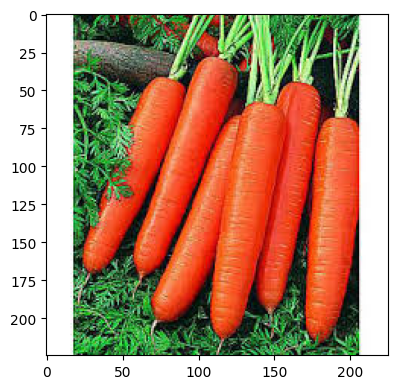

In [25]:
img=cv2.imread("E:/projects/internships/edunet/dataset/DATASET/TEST/O/O_12572.jpg")
predict_func(img)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
This image shows organic waste


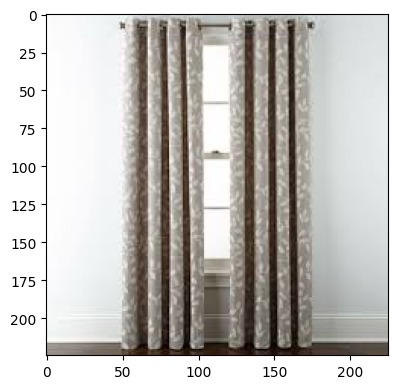

In [28]:
img=cv2.imread("E:/projects/internships/edunet_github/R_10038.jpg")
predict_func(img)